##### Import data and modules


In [25]:
!unzip -q  /content/sample_data/fashion-mnist_train.csv.zip -d ./

replace ./fashion-mnist_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [28]:
# installing minisom module
!pip install minisom

In [38]:
from minisom import MiniSom

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.preprocessing import scale

# MNIST 

In [30]:
digits = datasets.load_digits(n_class=10)
data = digits.data
data.shape

(1797, 64)

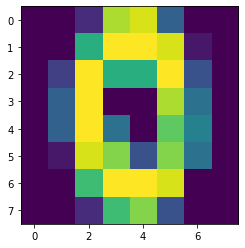

In [31]:
plt.imshow(data[55].reshape(8, 8))

In [32]:
data = scale(data)
num = digits.target
num.shape

(1797,)

In [33]:
num[55]

0

In [34]:
som = MiniSom(30, 30, 64, sigma=4, learning_rate=0.5, neighborhood_function='triangle')
som.pca_weights_init(data)
som.train(data, 5000, random_order=True, verbose=True)

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 3.01072616739172


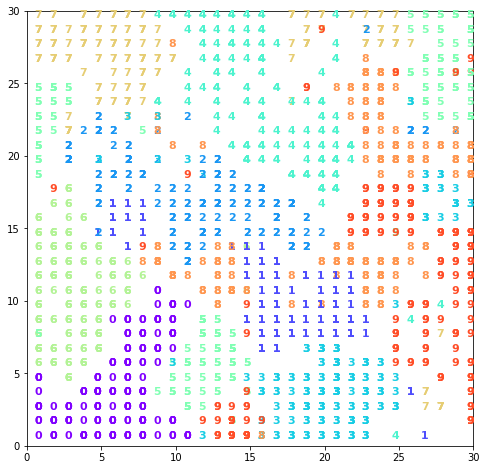

In [35]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, num):
    w = som.winner(x)
    wmap[w] = im
    plt.text(w[0]+0.5, w[1]+0.5, str(t),
            color=plt.cm.rainbow(t/10.), fontdict={'weight': 'bold',
                                                  'size':11})
    im = im + 1
    
plt.axis([0, som.get_weights().shape[0], 0, som.get_weights().shape[1]])
plt.savefig('som_digits.png')
plt.show()

In [36]:
som.get_weights().shape

(30, 30, 64)

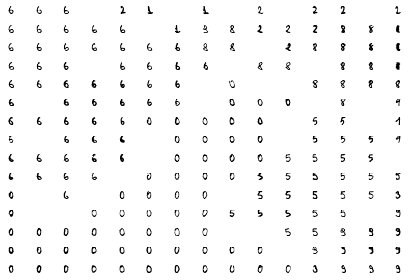

In [37]:
cnt = 0
for j in reversed(range(15)):  # images mosaic
    for i in range(15):
        plt.subplot(15, 15, cnt+1, frameon=False,  xticks=[],  yticks=[])
        if (i, j) in wmap:
            plt.imshow(digits.images[wmap[(i, j)]],
                       cmap='Greys', interpolation='nearest')
        else:
            plt.imshow(np.zeros((8, 8)),  cmap='Greys')
        cnt = cnt + 1

plt.tight_layout()
plt.savefig('som_digts_imgs.png')
plt.show()

# FashionMnist 

In [40]:
fashion = pd.read_csv('fashion-mnist_train.csv')
fashion.shape

(60000, 785)

In [41]:
fashion_labels = fashion['label'].to_numpy()
fashion_data = fashion.iloc[:, 1:].to_numpy()

In [42]:
fashion_labels.shape, fashion_data.shape

((60000,), (60000, 784))

In [43]:
fashion['label'].nunique()

10

In [44]:
som = MiniSom(30, 30, 784, sigma=4, learning_rate=0.5, neighborhood_function='triangle')
som.pca_weights_init(fashion_data)
som.train(fashion_data, 5000, random_order=True, verbose=True)

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 1060.051509516969


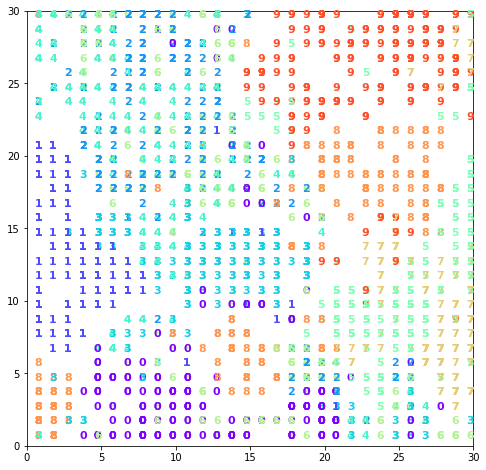

In [45]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(fashion_data[: 2000], fashion_labels[:2000]):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.savefig('som_fashion.png')
plt.show()

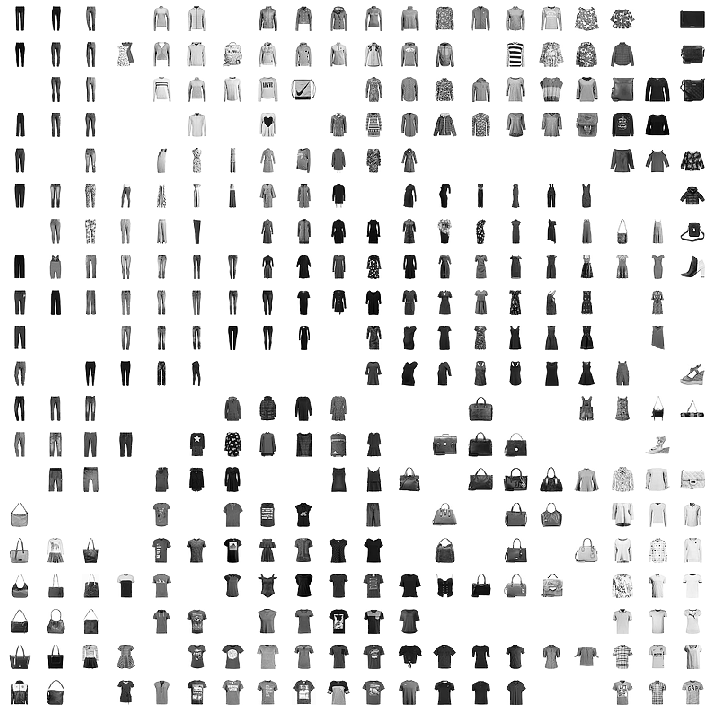

In [46]:
plt.figure(figsize=(10, 10), facecolor='white')
cnt = 0
for j in reversed(range(20)):  # images mosaic
    for i in range(20):
        plt.subplot(20, 20, cnt+1, frameon=False,  xticks=[],  yticks=[])
        if (i, j) in wmap:
            plt.imshow(fashion_data[wmap[(i, j)]].reshape(28, 28),
                       cmap='Greys', interpolation='nearest')
        else:
            plt.imshow(np.zeros((8, 8)),  cmap='Greys')
        cnt = cnt + 1

plt.tight_layout()
plt.savefig('som_fashion_imgs.png')
plt.show()